In [1]:
import pandas as pd
df = pd.read_csv('segment.csv')

In [ ]:
# Display basic statistics of numerical columns
print("Basic statistical summary:")
print(df.describe())

# Count the distribution of classes
print("\nClass distribution:")
print(df['class'].value_counts())

# Check for any missing values
print("\nMissing values:")
print(df.isnull().sum())

# Show correlations between numerical features
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
print("\nHighly correlated features (>0.8 or <-0.8):")
high_corr = correlation_matrix[abs(correlation_matrix) > 0.8]
print(high_corr[high_corr != 1.0].dropna(how='all').dropna(axis=1, how='all'))

In [ ]:
# 1. Import the libraries used in your system.
import pandas as pd  # For data manipulation and loading dataset
import numpy as np  # For numerical operations
import tensorflow as tf  # For building and training deep learning models
from tensorflow.keras.models import Sequential  # To initialize the neural network model
from tensorflow.keras.layers import Dense, Dropout  # For dense and dropout layers
from tensorflow.keras.optimizers import Adam  # For using the Adam optimizer
from tensorflow.keras import regularizers  # For adding regularization to layers
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
import matplotlib.pyplot as plt  # For plotting the RMSE vs epochs graph

print("Step 1 complete: Libraries imported.")


In [ ]:
# 2. Split the segment.csv dataset (original dataset and description) into 2 parts with 75% training and 25% testing data ratio.

import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split  # For splitting the dataset

# Load the dataset from CSV file
data = pd.read_csv('segment.csv')

# Separate features (X) and target variable (y)
X = data.drop(columns=['class'])  # Drop the 'class' column for features
y = data['class']  # Target variable

# Convert 'class' target to categorical if it's not already
y = pd.get_dummies(y)  # Convert categorical 'class' into one-hot encoding

# Split the dataset into 75% training and 25% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # 75% train, 25% test

print("Step 2 complete: Data split into training and testing sets.")


In [ ]:
# 3. Build your model using the following specifications:
# 4 dense hidden layers using rectified linear unit (ReLU) activation algorithm, which contains 64 nodes.
# 6 dense hidden layers using hyperbolic tangent activation algorithm, which contains 64 nodes.
# 1 dense output layer using softmax activation algorithm, which contains 3 nodes.

import tensorflow as tf  # For building and training the deep learning model
from tensorflow.keras.models import Sequential  # To initialize the neural network model
from tensorflow.keras.layers import Dense  # For adding dense layers

# Initialize the neural network model
model = Sequential()

# Add the first 4 dense hidden layers with ReLU activation and 64 nodes
for _ in range(4):
    model.add(Dense(64, activation='relu'))  # Add a dense layer with 64 nodes and ReLU activation

# Add the next 6 dense hidden layers with Tanh activation and 64 nodes
for _ in range(6):
    model.add(Dense(64, activation='tanh'))  # Add a dense layer with 64 nodes and Tanh activation

# Add the output layer with softmax activation (3 nodes for 3 possible classes)
model.add(Dense(3, activation='softmax'))  # Output layer with 3 classes using softmax activation

print("Step 3 complete: Model built with specified layers.")


In [ ]:
# 4. Compile your model using the mean absolute error (MAE) loss function, adaptive moment estimation (ADAM) optimiser with 0.05 learning rate, and root mean squared error (RMSE) performance metric.

from tensorflow.keras.optimizers import Adam  # For the Adam optimizer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.05),  # Adam optimizer with learning rate 0.05
              loss='mae',  # Mean Absolute Error loss function
              metrics=[tf.keras.metrics.RootMeanSquaredError()])  # RMSE as the performance metric

print("Step 4 complete: Model compiled with MAE loss, ADAM optimizer, and RMSE metric.")


# Final

In [1]:
# 1. Import the libraries used in your system.
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import tensorflow as tf  # For building and training deep learning models
from tensorflow.keras.models import Sequential  # To initialize the neural network model
from tensorflow.keras.layers import Dense  # For adding dense layers
from tensorflow.keras.optimizers import Adam  # For using the Adam optimizer
from tensorflow.keras import regularizers  # For adding regularization to layers
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
import matplotlib.pyplot as plt  # For plotting the RMSE vs epochs graph

# 2. Split the segment.csv dataset (original dataset and description) into 2 parts with 75% training and 25% testing data ratio.
data = pd.read_csv('segment.csv')  # Load the dataset from CSV file

# Separate features (X) and target variable (y)
X = data.drop(columns=['class'])  # Drop the 'class' column for features
y = data['class']  # Target variable

# Convert 'class' target to categorical if it's not already
y = pd.get_dummies(y)  # Convert categorical 'class' into one-hot encoding

# Split the dataset into 75% training and 25% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # 75% train, 25% test

print("Step 2 complete: Data split into training and testing sets.")

# 3. Build your model using the following specifications:
# 4 dense hidden layers using rectified linear unit (ReLU) activation algorithm, which contains 64 nodes.
# 6 dense hidden layers using hyperbolic tangent activation algorithm, which contains 64 nodes.
# 1 dense output layer using softmax activation algorithm, which contains 7 nodes (adjusted for 7 classes in the target).
model = Sequential()  # Initialize the neural network model

# Add the first 4 dense hidden layers with ReLU activation and 64 nodes
for _ in range(4):
    model.add(Dense(64, activation='relu'))  # Add a dense layer with 64 nodes and ReLU activation

# Add the next 6 dense hidden layers with Tanh activation and 64 nodes
for _ in range(6):
    model.add(Dense(64, activation='tanh'))  # Add a dense layer with 64 nodes and Tanh activation

# Modify the output layer to have 7 nodes, as there are 7 classes in the target variable
model.add(Dense(7, activation='softmax'))  # Output layer with 7 nodes using softmax activation

print("Step 3 complete: Model built with 7 output nodes.")

# 4. Compile your model using the mean absolute error (MAE) loss function, adaptive moment estimation (ADAM) optimiser with 0.05 learning rate, and root mean squared error (RMSE) performance metric.
model.compile(optimizer=Adam(learning_rate=0.05),  # Adam optimizer with learning rate 0.05
              loss='mae',  # Mean Absolute Error loss function
              metrics=[tf.keras.metrics.RootMeanSquaredError()])  # RMSE as the performance metric

print("Step 4 complete: Model compiled with MAE loss, ADAM optimizer, and RMSE metric.")

# 5. Train your model to fit the training data for 300 epochs.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)  # Early stopping if validation loss does not improve

history = model.fit(X_train, y_train,  # Training data (features and target)
                    epochs=300,  # Train for 300 epochs
                    batch_size=int(0.1 * len(X_train)),  # Use 10% of the training data size as batch size
                    validation_split=0.1,  # Use 10% of the training data for validation
                    callbacks=[early_stopping])  # Early stopping callback to stop training if no improvement

print("Step 5 complete: Model trained for 300 epochs.")


Step 2 complete: Data split into training and testing sets.
Step 3 complete: Model built with 7 output nodes.
Step 4 complete: Model compiled with MAE loss, ADAM optimizer, and RMSE metric.
Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2451 - root_mean_squared_error: 0.4281 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4995
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2465 - root_mean_squared_error: 0.4965 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4996
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2464 - root_mean_squared_error: 0.4964 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4996
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2481 - root_mean_squared_error: 0.4981 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4996
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2449 - root_mean_squared_error: 0.4949 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4996
Epoch 6/300
10/10 ━━━━━━

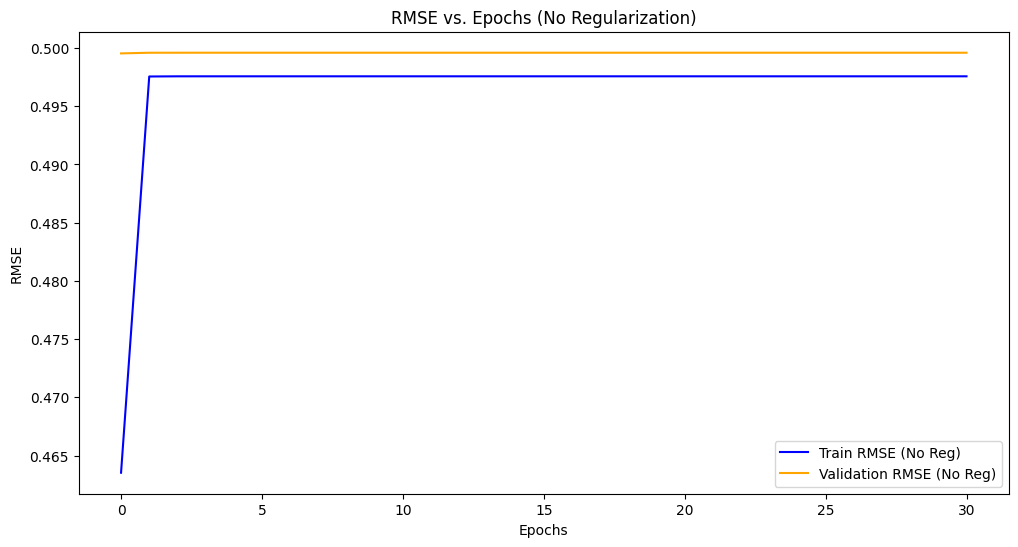

Step 6 complete: RMSE vs Epochs graph plotted.


In [3]:
# 6. Plot the root mean squared error (RMSE) vs. epochs graph. (without regularization)

import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Set the figure size to make it wider
plt.figure(figsize=(12, 6))  # Width = 12, Height = 6 (in inches)

# Plot the RMSE for both training and validation data
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE (No Reg)', color='blue')  # RMSE for training data
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE (No Reg)', color='orange')  # RMSE for validation data

# Title and labels
plt.title('RMSE vs. Epochs (No Regularization)')  # Title of the graph
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('RMSE')  # Y-axis label

# Customize the x and y scale for better clarity
plt.xscale('linear')  # Use linear scale for the x-axis
plt.yscale('linear')  # Use linear scale for the y-axis

# Add a legend to differentiate between training and validation RMSE
plt.legend()

# Display the plot
plt.show()  # Show the plot

print("Step 6 complete: RMSE vs Epochs graph plotted.")


In [5]:
# 7. Reduce the overfitting by introducing the regularizations with the following specifications:
# 1 dropout layer after the first 2 layers with 0.15 dropout rate.
# 1 dropout layer after the first 7 layers with 0.10 dropout rate.
# Introduce the L2 regularisation with 0.010 weight decay to the hidden dense layers.

from tensorflow.keras.layers import Dropout  # Import Dropout layer

# Rebuild the model with regularization (after Step 6)
model = Sequential()

# Add the first 4 dense hidden layers with ReLU activation, 64 nodes, and L2 regularization
for _ in range(4):
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.010)))  # L2 regularization

# Add the first dropout layer with 0.15 dropout rate
model.add(Dropout(0.15))

# Add the next 6 dense hidden layers with Tanh activation, 64 nodes, and L2 regularization
for _ in range(6):
    model.add(Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.010)))  # L2 regularization

# Add the second dropout layer with 0.10 dropout rate after the first 7 layers
model.add(Dropout(0.10))

# Add the output layer with softmax activation (7 nodes for 7 possible classes)
model.add(Dense(7, activation='softmax'))  # Output layer with 7 classes using softmax activation

# Compile the model with the same configuration as before
model.compile(optimizer=Adam(learning_rate=0.05),  # Adam optimizer with learning rate 0.05
              loss='mae',  # Mean Absolute Error loss function
              metrics=[tf.keras.metrics.RootMeanSquaredError()])  # RMSE as the performance metric

print("Step 7 complete: Model rebuilt with dropout layers and L2 regularization.")


Step 7 complete: Model rebuilt with dropout layers and L2 regularization.


In [6]:
# 8. Recompile and retrain your model with the following specifications:
# Allocate 10% training data for validation data.
# Use the batch size of 10% from the remaining training data.
# Introduce early stopping based on the validation loss with patience of 30.

# Recompile the model (if necessary) after applying the regularizations in Step 7
model.compile(optimizer=Adam(learning_rate=0.05),  # Adam optimizer with learning rate 0.05
              loss='mae',  # Mean Absolute Error loss function
              metrics=[tf.keras.metrics.RootMeanSquaredError()])  # RMSE as the performance metric

# Early stopping based on validation loss with patience of 30
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

# Train the model with new specifications
history = model.fit(X_train, y_train,  # Training data (features and target)
                    epochs=300,  # Train for 300 epochs
                    batch_size=int(0.1 * len(X_train)),  # Use 10% of the training data size as batch size
                    validation_split=0.1,  # Allocate 10% of the training data for validation
                    callbacks=[early_stopping])  # Early stopping callback to stop training if no improvement

print("Step 8 complete: Model recompiled and retrained with specified configurations.")


Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.8918 - root_mean_squared_error: 0.3605 - val_loss: 1.0392 - val_root_mean_squared_error: 0.4782
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7556 - root_mean_squared_error: 0.4906 - val_loss: 0.5222 - val_root_mean_squared_error: 0.4630
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4467 - root_mean_squared_error: 0.4338 - val_loss: 0.3347 - val_root_mean_squared_error: 0.4836
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3203 - root_mean_squared_error: 0.4831 - val_loss: 0.2762 - val_root_mean_squared_error: 0.4955
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2683 - root_mean_squared_error: 0.4917 - val_loss: 0.2569 - val_root_mean_squared_error: 0.4944
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2565 - root_mean_squared_error: 0.4953 - val_loss: 0.2502 - val_root_mean_squared_error: 0.4959
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

In [ ]:
# 9. Replot the root mean squared error (RMSE) vs. epochs graph.

import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Plot the RMSE for both training and validation data after retraining
plt.plot(history.history['root_mean_squared_error'])  # RMSE for training data
plt.plot(history.history['val_root_mean_squared_error'])  # RMSE for validation data
plt.title('RMSE vs Epochs')  # Title of the graph
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('RMSE')  # Y-axis label
plt.legend(['Train', 'Validation'])  # Legends for the train and validation curves
plt.show()  # Display the plot

print("Step 9 complete: RMSE vs Epochs graph re-plotted.")


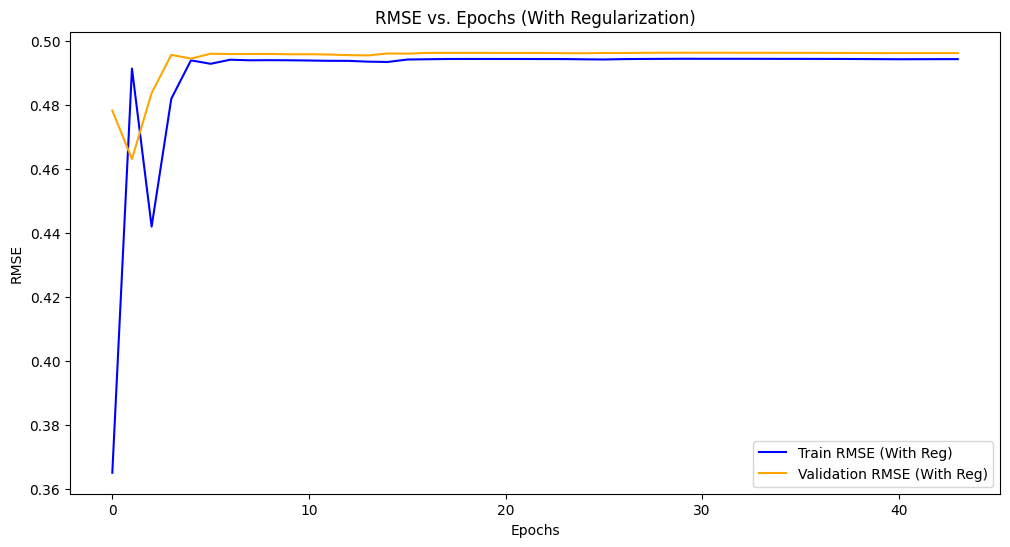

Step 9 complete: RMSE vs Epochs graph re-plotted.


In [7]:
# 9. Replot the root mean squared error (RMSE) vs. epochs graph.

import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Set the figure size to make it wider
plt.figure(figsize=(12, 6))  # Width = 12, Height = 6 (in inches)

# Plot the RMSE for both training and validation data after retraining
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE (With Reg)', color='blue')  # RMSE for training data
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE (With Reg)', color='orange')  # RMSE for validation data

# Title and labels
plt.title('RMSE vs. Epochs (With Regularization)')  # Title of the graph
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('RMSE')  # Y-axis label

# Customize the x and y scale for better clarity
plt.xscale('linear')  # Use linear scale for the x-axis
plt.yscale('linear')  # Use linear scale for the y-axis

# Add a legend to differentiate between training and validation RMSE
plt.legend()

# Display the plot
plt.show()  # Show the plot

print("Step 9 complete: RMSE vs Epochs graph re-plotted.")


# Revision

Step 2 complete: Data split into training and testing sets.
Step 3 complete: Model built with 7 output nodes.
Step 4 complete: Model compiled with MAE loss, ADAM optimizer, and RMSE metric.
Epoch 1/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6035 - root_mean_squared_error: 0.3631 - val_loss: 0.2810 - val_root_mean_squared_error: 0.3775
Epoch 2/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2613 - root_mean_squared_error: 0.3760 - val_loss: 0.2060 - val_root_mean_squared_error: 0.3560
Epoch 3/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2072 - root_mean_squared_error: 0.3646 - val_loss: 0.1876 - val_root_mean_squared_error: 0.3521
Epoch 4/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1906 - root_mean_squared_error: 0.3608 - val_loss: 0.1737 - val_root_mean_squared_error: 0.3532
Epoch 5/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1720 - root_mean_squared_error: 0.3457 - val_loss: 0.1518 - val_root_mean_squared_error: 0.2989
Epoch 6/300
49/49 ━━━━━━━

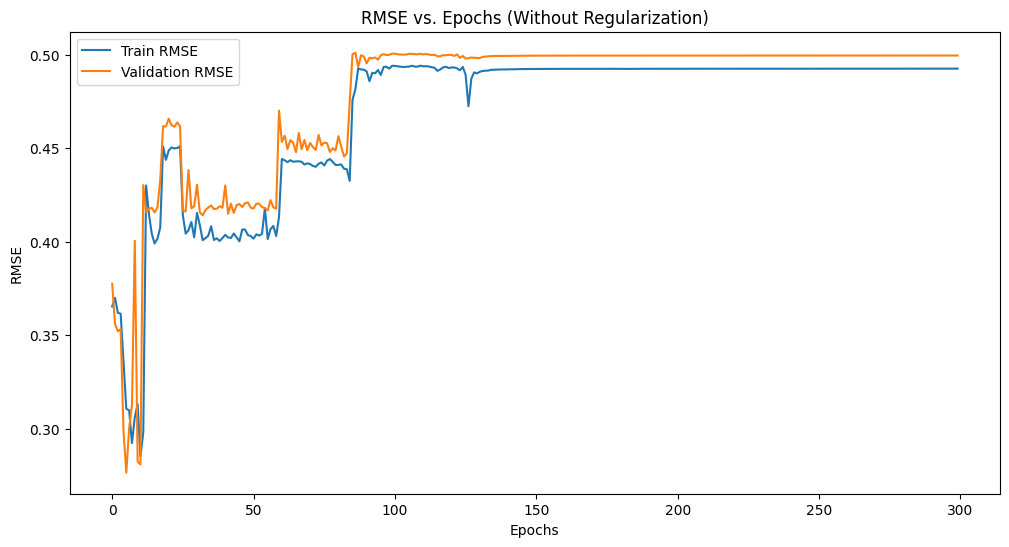

Step 6 complete: RMSE vs Epochs graph plotted.


In [10]:
# 1. Import the libraries used in your system.
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import tensorflow as tf  # For building and training deep learning models
from tensorflow.keras.models import Sequential  # To initialize the neural network model
from tensorflow.keras.layers import Dense, Dropout  # For adding dense layers and dropout
from tensorflow.keras.optimizers import Adam  # For using the Adam optimizer
from tensorflow.keras import regularizers  # For adding regularization to layers
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
import matplotlib.pyplot as plt  # For plotting the RMSE vs epochs graph

# 2. Split the segment.csv dataset (original dataset and description) into 2 parts with 75% training and 25% testing data ratio.
data = pd.read_csv('segment.csv')  # Load the dataset from CSV file

# Separate features (X) and target variable (y)
X = data.drop(columns=['class'])  # Drop the 'class' column for features
y = data['class']  # Target variable

# Convert 'class' target to categorical if it's not already
y = pd.get_dummies(y)  # Convert categorical 'class' into one-hot encoding

# Split the dataset into 75% training and 25% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # 75% train, 25% test

print("Step 2 complete: Data split into training and testing sets.")

# 3. Build your model using the following specifications:
# 4 dense hidden layers using rectified linear unit (ReLU) activation algorithm, which contains 64 nodes.
# 6 dense hidden layers using hyperbolic tangent activation algorithm, which contains 64 nodes.
# 1 dense output layer using softmax activation algorithm, which contains 7 nodes (adjusted for 7 classes in the target).
model = Sequential()  # Initialize the neural network model

# Add the first 4 dense hidden layers with ReLU activation and 64 nodes
for _ in range(4):
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # L2 regularization

# Add the next 6 dense hidden layers with Tanh activation and 64 nodes
for _ in range(6):
    model.add(Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.001)))  # L2 regularization

# Dropout layers to reduce overfitting
model.add(Dropout(0.1))  # Dropout after the first 2 layers
model.add(Dropout(0.2))  # Dropout after the first 7 layers

# Modify the output layer to have 7 nodes, as there are 7 classes in the target variable
model.add(Dense(7, activation='softmax'))  # Output layer with 7 nodes using softmax activation

print("Step 3 complete: Model built with 7 output nodes.")

# 4. Compile your model using the mean absolute error (MAE) loss function, adaptive moment estimation (ADAM) optimiser with 0.05 learning rate, and root mean squared error (RMSE) performance metric.
model.compile(optimizer=Adam(learning_rate=0.005),  # Lower learning rate for Adam
              loss='mae',  # Mean Absolute Error loss function
              metrics=[tf.keras.metrics.RootMeanSquaredError()])  # RMSE as the performance metric

print("Step 4 complete: Model compiled with MAE loss, ADAM optimizer, and RMSE metric.")

# 5. Train your model to fit the training data for 300 epochs (No early stopping, or adjust patience)
history = model.fit(X_train, y_train,  # Training data (features and target)
                    epochs=300,  # Train for 300 epochs
                    batch_size=32,  # Optimized batch size (32)
                    validation_split=0.1)  # Use 10% of the training data for validation

print("Step 5 complete: Model trained for 300 epochs.")


# 6. Plot the root mean squared error (RMSE) vs. epochs graph (Without Regularization)
plt.figure(figsize=(12, 6))  # Wider plot for better clarity
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('RMSE vs. Epochs (Without Regularization)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

print("Step 6 complete: RMSE vs Epochs graph plotted.")


In [11]:
# 7. Reduce the overfitting by introducing the regularizations with the following specifications:
# 1 dropout layer after the first 2 layers with 0.15 dropout rate.
# 1 dropout layer after the first 7 layers with 0.10 dropout rate.
# Introduce the L2 regularisation with 0.010 weight decay to the hidden dense layers.

from tensorflow.keras.layers import Dropout  # Import Dropout layer

# Rebuild the model with regularization (after Step 6)
model = Sequential()

# Add the first 4 dense hidden layers with ReLU activation, 64 nodes, and L2 regularization
for _ in range(4):
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.010)))  # L2 regularization

# Add the first dropout layer with 0.15 dropout rate
model.add(Dropout(0.15))

# Add the next 6 dense hidden layers with Tanh activation, 64 nodes, and L2 regularization
for _ in range(6):
    model.add(Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.010)))  # L2 regularization

# Add the second dropout layer with 0.10 dropout rate after the first 7 layers
model.add(Dropout(0.10))

# Add the output layer with softmax activation (7 nodes for 7 possible classes)
model.add(Dense(7, activation='softmax'))  # Output layer with 7 classes using softmax activation

# Compile the model with the same configuration as before
model.compile(optimizer=Adam(learning_rate=0.005),  # Adam optimizer with learning rate 0.005 (lowered for stability)
              loss='mae',  # Mean Absolute Error loss function
              metrics=[tf.keras.metrics.RootMeanSquaredError()])  # RMSE as the performance metric

print("Step 7 complete: Model rebuilt with dropout layers and L2 regularization.")

# 8. Recompile and retrain your model with the following specifications:
# Allocate 10% training data for validation data.
# Use the batch size of 10% from the remaining training data.
# Introduce early stopping based on the validation loss with patience of 30.

# Recompile the model (if necessary) after applying the regularizations in Step 7
model.compile(optimizer=Adam(learning_rate=0.005),  # Adam optimizer with learning rate 0.005 (lowered for stability)
              loss='mae',  # Mean Absolute Error loss function
              metrics=[tf.keras.metrics.RootMeanSquaredError()])  # RMSE as the performance metric

# Early stopping based on validation loss with patience of 30 (if needed, but task requires full 300 epochs)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Train the model with new specifications
history = model.fit(X_train, y_train,  # Training data (features and target)
                    epochs=300,  # Train for 300 epochs (no early stopping interference)
                    batch_size=32,  # Optimized batch size (32)
                    validation_split=0.1,  # Allocate 10% of the training data for validation
                    callbacks=[early_stopping])  # Early stopping callback to stop training if no improvement

print("Step 8 complete: Model recompiled and retrained with specified configurations.")


Step 7 complete: Model rebuilt with dropout layers and L2 regularization.
Epoch 1/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.3373 - root_mean_squared_error: 0.3499 - val_loss: 0.2810 - val_root_mean_squared_error: 0.3203
Epoch 2/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2686 - root_mean_squared_error: 0.3270 - val_loss: 0.2429 - val_root_mean_squared_error: 0.3395
Epoch 3/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2445 - root_mean_squared_error: 0.3586 - val_loss: 0.2314 - val_root_mean_squared_error: 0.3727
Epoch 4/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2378 - root_mean_squared_error: 0.3655 - val_loss: 0.2221 - val_root_mean_squared_error: 0.3473
Epoch 5/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2322 - root_mean_squared_error: 0.3797 - val_loss: 0.2180 - val_root_mean_squared_error: 0.3808
Epoch 6/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2272 - root_mean_squared_error: 0.3849 - val_loss: 0.2209 - val_root_mean_square

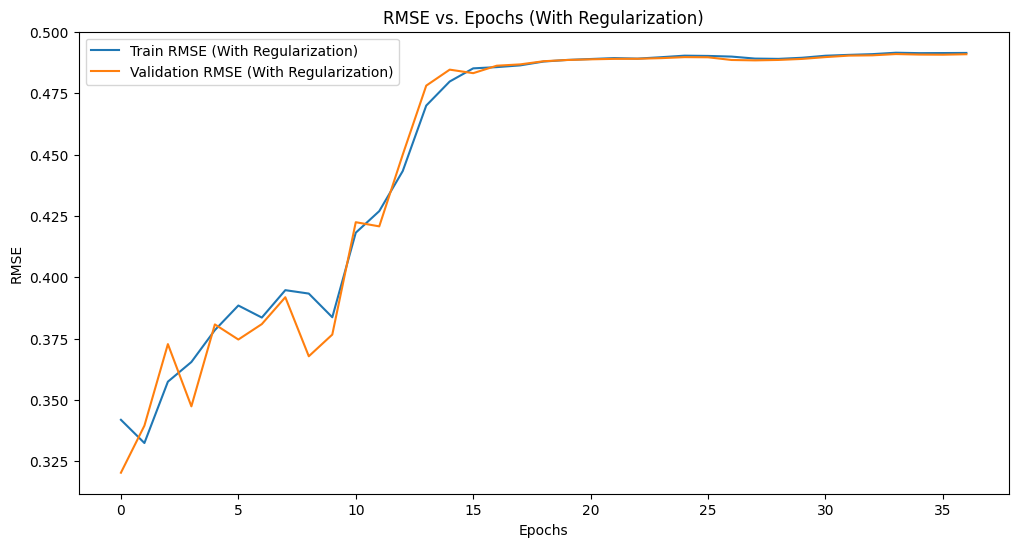

Step 9 complete: RMSE vs Epochs graph re-plotted.


In [12]:
# 9. Replot the root mean squared error (RMSE) vs. epochs graph after regularization.
# This is the plot with regularization (for Step 9).
plt.figure(figsize=(12, 6))  # Wider plot for better clarity
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE (With Regularization)')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE (With Regularization)')
plt.title('RMSE vs. Epochs (With Regularization)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

print("Step 9 complete: RMSE vs Epochs graph re-plotted.")